In [2]:
import importlib.util
import os
import matplotlib.pyplot as plt

# Add the DLL directory
os.add_dll_directory("C:\\Program Files\\Lumerical\\v232\\api\\python")

# Define the module name and file path
module_name = "lumapi"
# file_path = "C:\\Program Files\\Lumerical\\v232\\api\\python\\lumapi.py"
file_path = "C:\\Program Files\\Lumerical\\v232\\api\\python\\lumapi.py"


def load_module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module


# Load the module
lumapi = load_module_from_file(module_name, file_path)

C:\Program Files\Lumerical\v232\api\python\lumapi.py:882: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [3]:
file_path = "pc_slab_rcwa.fsp"
rcwa = lumapi.FDTD(filename=file_path)

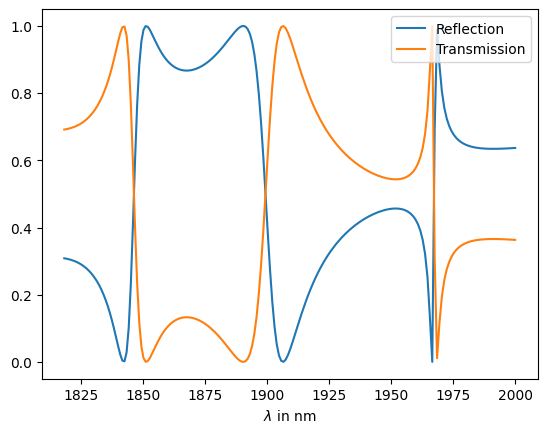

In [14]:
total_energy = rcwa.getresult("RCWA", "total_energy")
lam = total_energy["lambda"]*1e+9 # [nm]
Rp = total_energy["Rp"]
Tp = total_energy["Tp"]
plt.plot(lam, Rp, label="Reflection")
plt.plot(lam, Tp, label="Transmission")
plt.xlabel(r"$\lambda$ in nm")
plt.legend(loc="upper right")
plt.show()

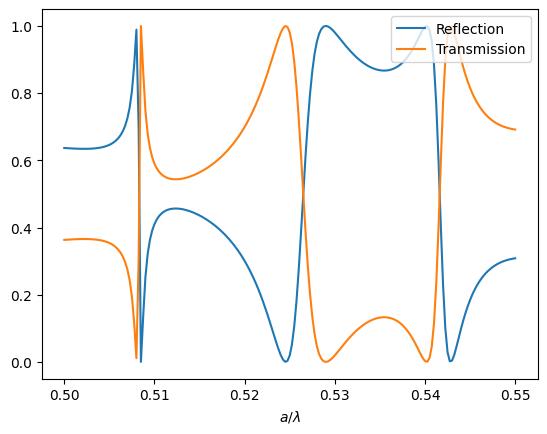

In [8]:
a = 1e-6
total_energy = rcwa.getresult("RCWA", "total_energy")
lam = total_energy["lambda"]
Rp = total_energy["Rp"]
Tp = total_energy["Tp"]
plt.plot(a/lam, Rp, label="Reflection")
plt.plot(a/lam, Tp, label="Transmission")
plt.xlabel(r"$a/ \lambda$")
plt.legend(loc="upper right")
plt.show()